In [ ]:
pip install --upgrade sklearn

In [ ]:
pip install graphviz

In [ ]:
import pandas as pd
import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dataf=pd.read_csv("/content/Iris.csv")
dataf

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Checking if there is a Null value in any column

In [ ]:
dataf[data.isnull().any(axis=1)].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


Deleting the Id column

In [ ]:
data=dataf.drop(['Id'], axis = 1)

In [ ]:
X=data.drop(columns=["Species"])
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
features=X.columns
features

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [ ]:
y=data["Species"]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
className=['Species']
className

['Species']

**Splitting Dataset into Training and Testing Datasets**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=50)

**Using GridSearch Method for best HyperParameters**

In [ ]:
tree_para = {'criterion':['gini','entropy'],"max_depth": np.arange(2, 8),
              'max_features': np.arange(2,5)}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=8)
clf.fit(X_train, y_train)

GridSearchCV(cv=8, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [ ]:
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Best Parameters**

In [ ]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_features': 3}

Calculating the Accuracy Score

In [ ]:
pred=clf.predict(X_test)
print("The accuracy score of this Decision Tree is:- ",accuracy_score(y_test,pred))

The accuracy score of this Decision Tree is:-  0.9473684210526315


**Building the Final Model of the Decision Tree**


In [ ]:
clf_final=DecisionTreeClassifier(max_depth=5,max_features=4)
clf_final.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
Finalpred=clf_final.predict(X_test)
print("The accuracy score of the Final Decision Tree is:- ",accuracy_score(y_test,Finalpred))

The accuracy score of the Final Decision Tree is:-  0.9473684210526315


**Visualizing Decision Tree Graphically**

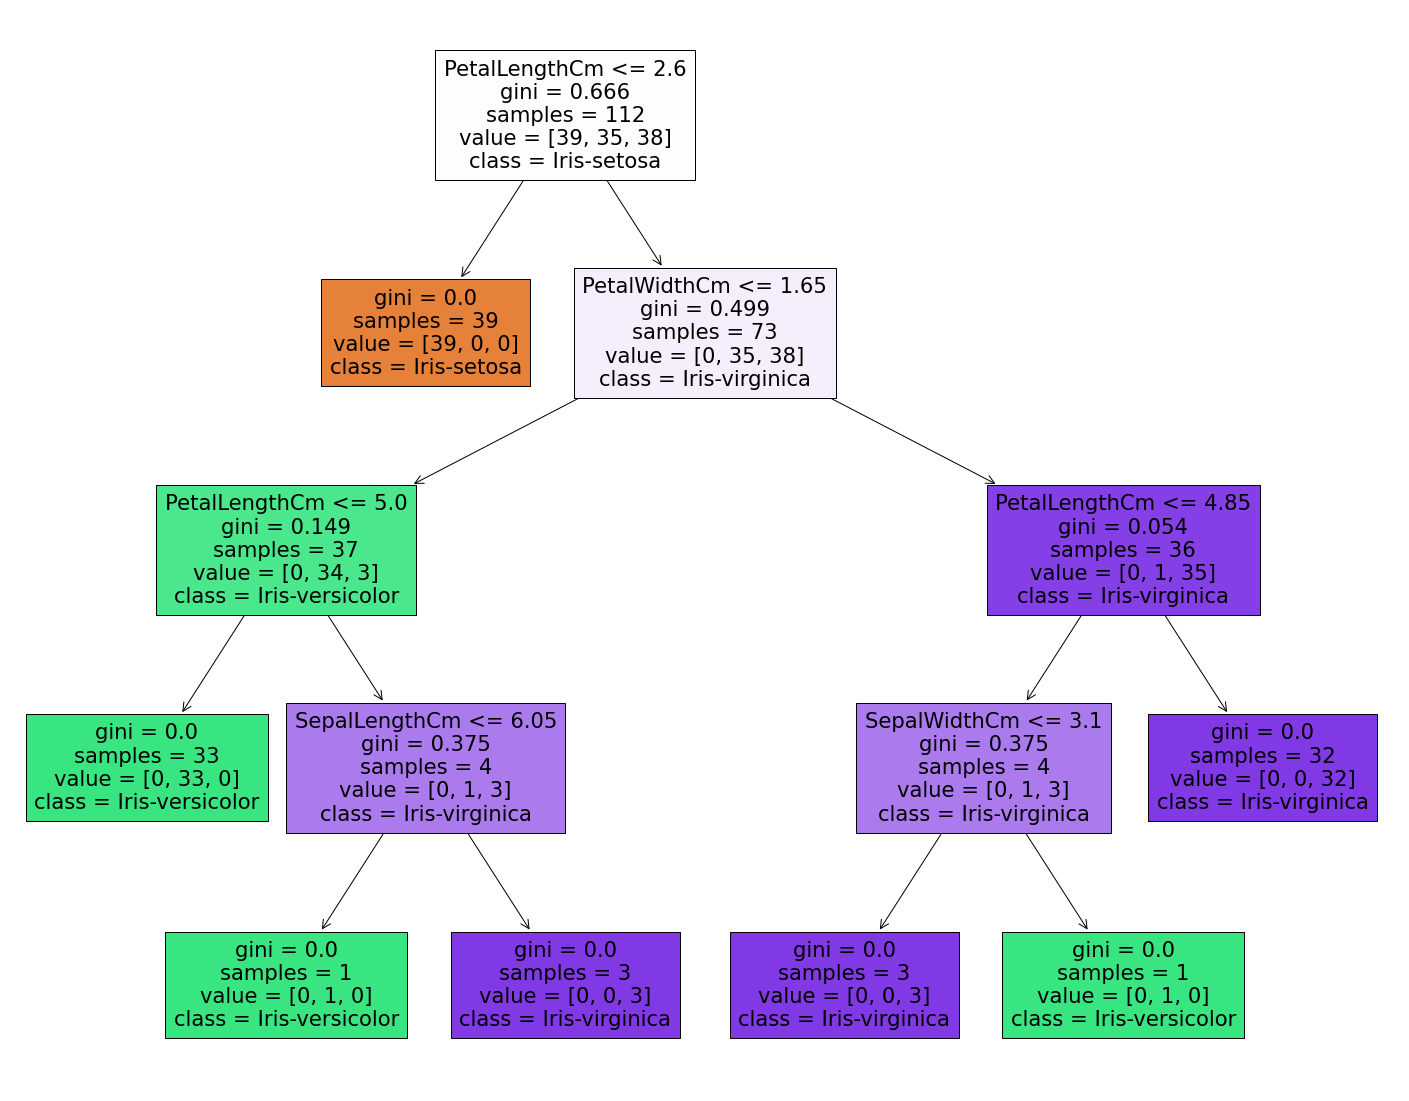

In [ ]:
fig = plt.figure(figsize=(25,20))
sklearn.tree.plot_tree(clf_final, 
                   feature_names=features,  
                   class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                   filled=True)
fig.savefig('DecisionTreeFinal.png')